In [283]:
# import all necessary packages
import pandas as pd
import numpy as np


# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [284]:
# load data to a new dataframe
df = pd.read_csv("data_fixed.csv")

In [285]:
# check the shape
df.dtypes

Nama                 object
average wpm         float64
average accuracy     object
second_1              int64
second_2              int64
second_3              int64
second_4              int64
average_second      float64
dtype: object

In [286]:
# first five rows of the dataframe
df.head()

,Nama,average wpm,average accuracy,second_1,second_2,second_3,second_4,average_second
0,Daffa Arya Pramudita,52.333333,94%,537,653,456,584,557.50
1,Daffa Trian,38.666667,81%,241,303,360,398,325.50
2,daiyan ramzhy faturrahman,28.000000,100%,1462,684,703,930,944.75
3,Farhan Adi Razzan,55.333333,96%,629,781,672,753,708.75
4,Farhan Ihsanudin,47.333333,100%,390,341,302,479,378.00


In [287]:
# describe the dataframe with some statistical info
df.describe()

,average wpm,second_1,second_2,second_3,second_4,average_second
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,48.526316,631.421053,562.421053,532.052632,592.684211,579.644737
std,11.505402,293.730473,216.299770,217.997317,210.591509,211.457431
min,28.000000,241.000000,247.000000,246.000000,258.000000,279.000000
25%,44.000000,422.000000,343.000000,379.500000,437.000000,392.875000
50%,47.333333,612.000000,636.000000,466.000000,584.000000,583.000000
75%,53.166667,732.500000,702.500000,674.500000,721.000000,692.625000
max,75.000000,1462.000000,981.000000,1088.000000,1030.000000,1034.750000


In [288]:
# column names of the dataframe
df.columns

Index(['Nama', 'average wpm', 'average accuracy', 'second_1', 'second_2',
       'second_3', 'second_4', 'average_second'],
      dtype='object')

In [289]:
# create a new simple dataframe using the existing one
new_df = df[['average wpm', 'average_second']]
new_df

,average wpm,average_second
0,52.333333,557.50
1,38.666667,325.50
2,28.000000,944.75
3,55.333333,708.75
4,47.333333,378.00
5,54.000000,406.75
6,59.666667,832.00
7,44.000000,279.00
8,46.000000,676.50
9,45.666667,634.25


<Axes: xlabel='average wpm', ylabel='average_second'>

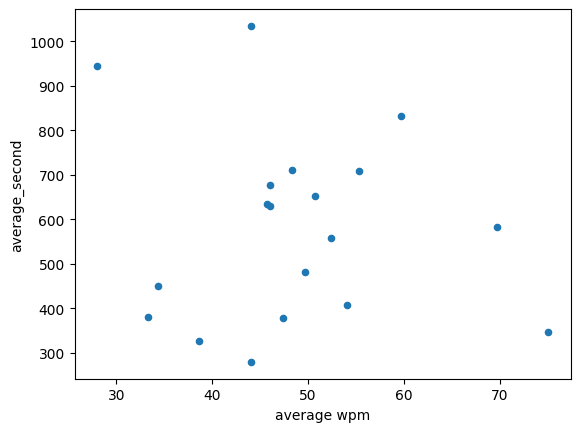

In [290]:
# check the distribution of data by plotting as scatter
new_df.plot(x='average wpm', y='average_second', kind='scatter')	

<Axes: xlabel='average wpm', ylabel='average_second'>

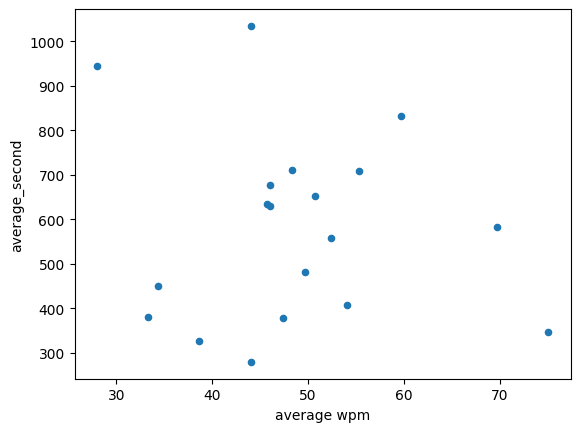

In [291]:

# compare below plot with the previous one
df.plot(x='average wpm', y='average_second', kind='scatter')

In [292]:
x_col = 'average wpm'  # Ganti 'kolom_x' dengan nama kolom x dalam file Excel Anda
y_col = 'average_second'  # Ganti 'kolom_y' dengan nama kolom y dalam file Excel Anda

x= df[x_col].values
y = df[y_col].values

# Bentuk data x menjadi matriks fitur dengan dimensi yang sesuai (n_samples, n_features)

#X = x.reshape(-1, 1)

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [294]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (15,)
X_test: (4,)
Y_train: (15,)
Y_test: (4,)


In [295]:
# create a linear regression model
model = LinearRegression()

In [296]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train.reshape(-1,1), y_train)  

LinearRegression()

In [297]:
# print coefficient
model.coef_

array([-2.74687871])

In [298]:
# print y_intercept | bias
model.intercept_

752.4983052799516

In [299]:
# make predictions using test data
y_pred = model.predict(x_test.reshape(-1,1))

In [300]:
# let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

MSE -->  56155.164809934184
RMSE -->  236.97081003772212
MAE -->  213.07796522600918
R2 -->  -1.769195569614301


Text(0, 0.5, 'Predicted')

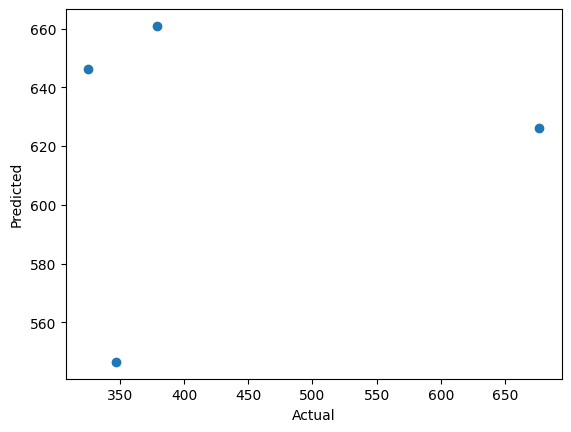

In [301]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: >

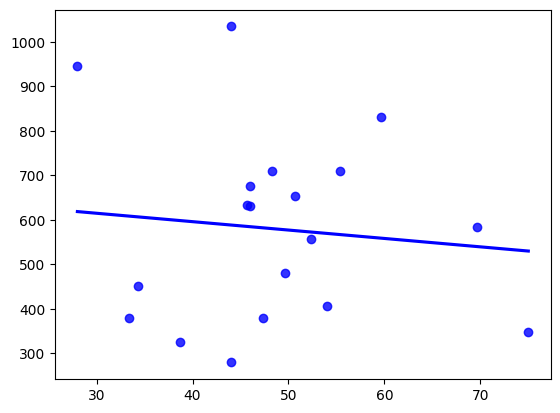

In [302]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')

In [303]:
# create a metrics dataframe using metric values
metrics = {
    'Model': ['First'],
    'MSE' : [mse],
    'RMSE' : [rmse],
    'MAE' : [mae],
    'R2' : [r2]
    }

metrics_df = pd.DataFrame(data=metrics)

# compare the values
metrics_df


,Model,MSE,RMSE,MAE,R2
0,First,56155.16481,236.97081,213.077965,-1.769196
